In [10]:
import urllib.request
import json, datetime,time,requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
cine=[]

In [5]:
movieDate = time.strftime('%Y%m%d', time.localtime(time.time()))
movieDate

'20220314'

In [7]:
datetime_obj = datetime.datetime.strptime(movieDate,'%Y%m%d').date()
datetime_obj

datetime.date(2022, 3, 14)

In [8]:
datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)
datetime_obj_tmp

datetime.date(2022, 3, 13)

In [18]:
#영화진흥위원회
def cineBoxInfo():
    key='ea996a36aacc9ba170b113d635279423'
    movieDate = time.strftime('%Y%m%d', time.localtime(time.time()))
    cine=[]
    for i in range(30):
        datetime_obj = datetime.datetime.strptime(movieDate,'%Y%m%d').date()
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)
        movieDate = datetime_obj_tmp.strftime('%Y%m%d')
        url=f'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={movieDate}'
        res = requests.get(url).json()
        result = res['boxOfficeResult']['dailyBoxOfficeList']
        for j in range(len(result)):
            result[j]['targetDt'] = movieDate
        # print(result)
        cine.extend(result)
    return pd.DataFrame(cine)

In [20]:
df = cineBoxInfo()

In [28]:
codeitem = pd.unique(df['movieNm'])
codeitem

array(['이상한 나라의 수학자', '더 배트맨', '극장판 주술회전 0', '언차티드',
       '나의 히어로 아카데미아 더 무비: 월드 히어로즈 미션', '블랙라이트', '안테벨룸', '스파이더맨: 노 웨이 홈',
       '극장판 바다 탐험대 옥토넛 : 해저동굴 대탈출\t', '인민을 위해 복무하라', '레벤느망', '나이트메어 앨리',
       '해적: 도깨비 깃발', '우리가 사랑이라고 믿는 것', '소피의 세계', '시라노', '킹메이커',
       '에이핑크 스페셜 무비 : 혼', '나이트 레이더스', '나일 강의 죽음', '씽2게더', '화양연화',
       '리코리쉬 피자', '나의 촛불', '극장판 안녕 자두야: 제주도의 비밀', '듄', '355',
       '만년이 지나도 변하지 않는 게 있어'], dtype=object)

In [29]:
codeitem.tolist()

['이상한 나라의 수학자',
 '더 배트맨',
 '극장판 주술회전 0',
 '언차티드',
 '나의 히어로 아카데미아 더 무비: 월드 히어로즈 미션',
 '블랙라이트',
 '안테벨룸',
 '스파이더맨: 노 웨이 홈',
 '극장판 바다 탐험대 옥토넛 : 해저동굴 대탈출\t',
 '인민을 위해 복무하라',
 '레벤느망',
 '나이트메어 앨리',
 '해적: 도깨비 깃발',
 '우리가 사랑이라고 믿는 것',
 '소피의 세계',
 '시라노',
 '킹메이커',
 '에이핑크 스페셜 무비 : 혼',
 '나이트 레이더스',
 '나일 강의 죽음',
 '씽2게더',
 '화양연화',
 '리코리쉬 피자',
 '나의 촛불',
 '극장판 안녕 자두야: 제주도의 비밀',
 '듄',
 '355',
 '만년이 지나도 변하지 않는 게 있어']

In [24]:
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,0,OLD,20190299,이상한 나라의 수학자,2022-03-09,604629280,42.6,51307650,9.3,2345227040,61979,5674,10.1,246226,1310,5248,20220313
1,2,2,0,OLD,20212973,더 배트맨,2022-03-01,452014860,31.8,-63578060,-12.3,7623442050,42398,-5603,-11.7,733821,1464,4029,20220313
2,3,3,0,OLD,20223278,극장판 주술회전 0,2022-02-17,112230270,7.9,-10229390,-8.4,4459580390,11154,-984,-8.1,447488,591,1153,20220313
3,4,4,1,OLD,20211200,언차티드,2022-02-16,56527170,4.0,-483960,-0.8,7015501590,5596,41,0.7,717126,514,818,20220313
4,5,5,-1,OLD,20223828,나의 히어로 아카데미아 더 무비: 월드 히어로즈 미션,2022-03-09,53044150,3.7,-3868260,-6.8,343242720,5396,-408,-7,35635,433,727,20220313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,6,0,OLD,20205261,나의 촛불,2022-02-10,60576940,4.1,26644570,78.5,200338760,5847,2576,78.8,19583,294,464,20220212
296,7,7,0,OLD,20210087,듄,2021-10-20,90880260,6.2,42780050,88.9,17152684220,5801,2651,84.2,1565757,47,115,20220212
297,8,8,0,OLD,20218764,씽2게더,2022-01-05,54261510,3.7,35945310,196.2,7839439910,5483,3575,187.4,846149,426,585,20220212
298,9,9,0,NEW,20223278,극장판 주술회전 0,2022-02-17,46748200,3.2,46748200,100,56279700,4270,4270,100,4951,64,64,20220212


In [27]:
df.tail(2)

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
298,9,9,0,NEW,20223278,극장판 주술회전 0,2022-02-17,46748200,3.2,46748200,100,56279700,4270,4270,100,4951,64,64,20220212
299,10,10,2,OLD,20212952,극장판 안녕 자두야: 제주도의 비밀,2022-01-27,28808620,2.0,20695620,255.1,863684450,3174,2202,226.5,98371,307,374,20220212


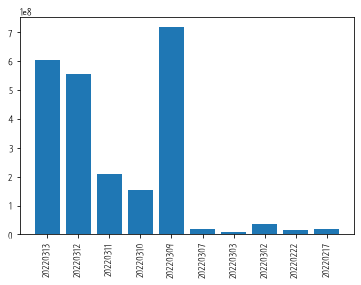

In [38]:
title = '이상한 나라의 수학자'
temp = df[df['movieNm']==title]
# temp.dtypes
plt.rcParams['font.family']='NanumBarunpen'
plt.bar(temp['targetDt'],temp['salesAmt'].astype(int))
plt.xticks(rotation=90)
plt.savefig('movie.png')